In [4]:
import pandas as pd
from germansentiment import SentimentModel
import time as tm
import numpy as np


In [16]:
!pwd

/home/lucab/code/NicolasBuehringer/project_delphi/notebooks/03nicolas


In [5]:
!pip install germansentiment

In [29]:
data_full = pd.read_csv("sample_twitter_api.csv", lineterminator='\n')

In [33]:
# get 1000 tweets per iteration 

In [34]:
max_len = (len(data_full) + x)
max_len

5953

In [35]:
x = 987

In [43]:
data_full


,Unnamed: 0,author_id,source,lang,tweet_created_at,tweet_id,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,username,profile_created_at,name,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,location,geo.place_id
0,0,1106890880,Twitter for iPad,de,2021-08-23T23:59:54.000Z,1429956596575227906,"Heute beim Versuch von SPD Wahl zu überzeugen,...",0,0,0,0,kritik2punkt0,2013-01-20T18:04:25.000Z,M,815,4999,45639,13,NaN,NaN
1,1,40453076,Twitter for Android,de,2021-08-23T23:59:39.000Z,1429956534465818641,"Wenn ein Laschet ein Mann wäre, würde man so e...",0,0,1,0,Shevek1981,2009-05-16T12:10:39.000Z,Shevek,398,1013,6894,29,"Kiel, Schleswig-Holstein",NaN
2,2,379140899,Twitter for Android,de,2021-08-23T23:59:33.000Z,1429956507039371268,Tritt @ArminLaschet jetzt der @AfDimBundestag ...,0,0,0,0,Pflegekraft1,2011-09-24T12:53:33.000Z,Pflegekraft,640,5000,61841,13,BRD,NaN
3,3,1321047775681851392,Twitter for iPhone,de,2021-08-23T23:59:32.000Z,1429956503377690630,@MissBJArmstrong @DPflugk Deutschland steht ku...,4,1,10,0,free_speech_67,2020-10-27T11:15:33.000Z,מיכאל קולהאס,1204,4482,34815,3,"Quito, Ecuador",NaN
4,4,1176821601179971585,Twitter for Android,de,2021-08-23T23:59:28.000Z,1429956487800102914,@ECMOKaragianni1 Gibt es einen Grund warum Pol...,0,1,7,0,dieser_Schuft,2019-09-25T11:31:55.000Z,คɭՇєг 🇩🇪 ŦคɭՇєг in Urlaub 🇫🇷,459,745,5560,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,4961,37884894,Twitter for Android,de,2021-08-14T21:51:43.000Z,1426662848059645952,@Storch_i @JM_Luczak @cducsubt @CDU @andreassc...,0,1,2,0,andiewoerle,2009-05-05T08:24:57.000Z,Andie Wörle,782,1085,3364,10,Europa,NaN
4962,4962,17324247,Twitter Web App,de,2021-08-14T21:51:36.000Z,1426662816073883651,"Ich glaube, die @CDU will diese #btw21 nicht ...",0,1,0,0,toxicTom,2008-11-11T22:33:37.000Z,toxicTom,20,299,734,0,Somewhere,NaN
4963,4963,1325055316053069825,Twitter Web App,de,2021-08-14T21:51:27.000Z,1426662780078284800,@MarianBracht @ArminLaschet Gehört.......Aber ...,0,0,0,0,in_wunde,2020-11-07T12:39:56.000Z,BirdMountainRedNeckRebelFromBirth,45,110,1459,1,Vogelsberg,NaN
4964,4964,1178379178082799624,Twitter for iPad,de,2021-08-14T21:51:18.000Z,1426662743390703617,"#CDU macht sich lächerlich, wo‘s nur geht… 🤦‍♀...",0,0,1,0,edelsteinchen1,2019-09-29T18:41:26.000Z,edelsteinchen💉💉💎MirScheintDieSonneAusmArsch☀️😍,225,383,8176,0,"Köln, Deutschland",NaN


In [36]:
full_sentiment = []

In [37]:
all_id_with_sentiment = []

In [44]:
# this for loop throws an error, last two buckets are done afterwards

counter = 0

# iterate over a range of 0, 394.755 with step size 987
for i in range(0,max_len, x):

  # get start time of iteration
    start = tm.time()

  # print counter
    counter += 1
    print(f"Starting iteration {counter}")

  # slice dataframe for the current 987 rows
    temp = data_full.iloc[i: (i + x)]

  # turn tweets into a list for sentiment analysis
    temp_tweets = list(temp.text)

  # turn tweet id in a list to know what tweets are used
    all_id_with_sentiment.append(list(temp.tweet_id))
  
  # predict sentiment analysis on current 987 tweets
    temp_result = model.predict_sentiment(temp_tweets)

  # append to before defined empty list
    full_sentiment.append(temp_result)

  # compute runtime for iteration
    stop = tm.time()
    print(f"Finished iteration {counter} in {stop-start} seconds")

Starting iteration 1


NameError: name 'model' is not defined

In [238]:
# get data slice of last two missing iterations
first_missing_data = list(data_full.iloc[x * 398: x*399].tweet)
second_missing_data = list(data_full.iloc[x * 399:].tweet)

In [239]:
# somehow a float in there; fix with this
first_missing_data = [str(x) for x in first_missing_data]

In [240]:
missing_results = []

In [241]:
# predicting last two iterations
p1 = model.predict_sentiment(first_missing_data)
missing_results.append(p1)

p2 = model.predict_sentiment(second_missing_data)
missing_results.append(p2)

In [217]:
#appending result to final output
full_sentiment.append(missing_results[0])
full_sentiment.append(missing_results[1])

In [ ]:
#turning list of lists for each iteration into one list
sentiment_values = sum(full_sentiment_real, [])

In [249]:
#checking correct prediction lenght
len(sentiment_values) == len(data_full)

True

In [250]:
#adding sentiment collumn to tweet DF
data_full["sentiment"] = sentiment_values

In [152]:
tr = pd.DataFrame(sentiment_values, columns = ["sentiment"])

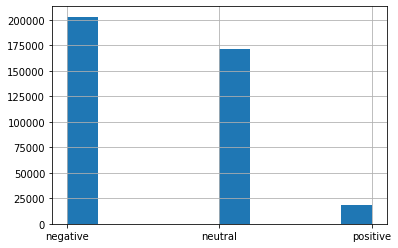

In [154]:
tr.sentiment.hist()

In [252]:
# saving csv and downloading it
data_full.to_csv("data_full_sentiment.csv")
files.download("data_full_sentiment.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>